In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv("/content/credit_score.csv")
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20229 entries, 0 to 20228
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        20229 non-null  object 
 1   Customer_ID               20229 non-null  object 
 2   Month                     20229 non-null  object 
 3   Name                      18215 non-null  object 
 4   Age                       20229 non-null  object 
 5   SSN                       20229 non-null  object 
 6   Occupation                20229 non-null  object 
 7   Annual_Income             20229 non-null  object 
 8   Monthly_Inhand_Salary     17207 non-null  float64
 9   Num_Bank_Accounts         20229 non-null  int64  
 10  Num_Credit_Card           20229 non-null  int64  
 11  Interest_Rate             20229 non-null  int64  
 12  Num_of_Loan               20229 non-null  object 
 13  Type_of_Loan              17973 non-null  object 
 14  Delay_

In [4]:
cat_col = df.select_dtypes(include='object')
for i in cat_col:
  print(f"Column name: {i} \n{df[i].value_counts()}\n\n")

Column name: ID 
0x1602    1
0x6502    1
0x650d    1
0x650c    1
0x650b    1
         ..
0x3d80    1
0x3d7f    1
0x3d7e    1
0x3d7d    1
0x8c86    1
Name: ID, Length: 20229, dtype: int64


Column name: Customer_ID 
CUS_0xd40     8
CUS_0x8562    8
CUS_0x6734    8
CUS_0x3678    8
CUS_0x4ff7    8
             ..
CUS_0x9894    8
CUS_0x907c    8
CUS_0x329f    8
CUS_0x82f8    8
CUS_0x9a84    5
Name: Customer_ID, Length: 2529, dtype: int64


Column name: Month 
January     2529
February    2529
March       2529
April       2529
May         2529
June        2528
July        2528
August      2528
Name: Month, dtype: int64


Column name: Name 
Nate Raymondw         29
Paulr                 23
Kevin Yaou            23
Deepa Seetharamanm    23
Steven C.z            22
                      ..
Vinocurw               4
Clare Jimz             4
Janw                   4
Oreskovicz             4
Ross Kerberb           3
Name: Name, Length: 2412, dtype: int64


Column name: Age 
36       631
42       60

In [5]:
not_col = ['ID','Customer_ID','Name','SSN','Type_of_Loan','Credit_History_Age']
num_col_missidentified = ['Age','Annual_Income','Num_of_Loan','Num_of_Delayed_Payment',
                          'Changed_Credit_Limit','Outstanding_Debt','Amount_invested_monthly','Monthly_Balance']
wrong_cat_col = ['Occupation','Credit_Mix','Payment_Behaviour','Payment_of_Min_Amount']

In [6]:
def data_type_change(col):
  un = df1[df1[col].str.isnumeric() ==False][col].tolist()
  change = []
  for i in range(len(un)):
    for j in range(len(un[i])):
      if(un[i][j].isnumeric() == False):
        if(un[i][j] not in change):
          if(un[i][j]!='.'):
            change.append(un[i][j])
  for i in change:
    df[col] = df[col].str.replace(i,"")
  df[col] = df[col].replace(r'^\s*$', np.nan, regex=True)
  if(df[col][25].isdigit() and df[col].isnull().sum() == 0):
    df[col] = df[col].astype(dtype=int)
  else:
    df[col] = df[col].astype(dtype=float)

df1 = df.dropna()

In [7]:
# for num_col_missidentified
for i in num_col_missidentified:
  data_type_change(i)

# for wrong_cat_col
df['Occupation'] = df['Occupation'].replace("_______",np.nan)
df['Credit_Mix'] = df['Credit_Mix'].replace("_",np.nan)
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace("!@9#%8",np.nan)
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace("NM",'No')

# for not_col
df.drop(columns=not_col,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20229 entries, 0 to 20228
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     20229 non-null  object 
 1   Age                       20229 non-null  int64  
 2   Occupation                18830 non-null  object 
 3   Annual_Income             20229 non-null  float64
 4   Monthly_Inhand_Salary     17207 non-null  float64
 5   Num_Bank_Accounts         20229 non-null  int64  
 6   Num_Credit_Card           20229 non-null  int64  
 7   Interest_Rate             20229 non-null  int64  
 8   Num_of_Loan               20229 non-null  int64  
 9   Delay_from_due_date       20229 non-null  int64  
 10  Num_of_Delayed_Payment    18808 non-null  float64
 11  Changed_Credit_Limit      19818 non-null  float64
 12  Num_Credit_Inquiries      19824 non-null  float64
 13  Credit_Mix                16177 non-null  object 
 14  Outsta

In [9]:
df.isnull().sum()/df.shape[0]*100

Month                        0.000000
Age                          0.000000
Occupation                   6.915814
Annual_Income                0.000000
Monthly_Inhand_Salary       14.938949
Num_Bank_Accounts            0.000000
Num_Credit_Card              0.000000
Interest_Rate                0.000000
Num_of_Loan                  0.000000
Delay_from_due_date          0.000000
Num_of_Delayed_Payment       7.024569
Changed_Credit_Limit         2.031737
Num_Credit_Inquiries         2.002076
Credit_Mix                  20.030649
Outstanding_Debt             0.000000
Credit_Utilization_Ratio     0.000000
Payment_of_Min_Amount        0.000000
Total_EMI_per_month          0.000000
Amount_invested_monthly      4.394681
Payment_Behaviour            7.266795
Monthly_Balance              1.285284
Credit_Score                 0.004943
dtype: float64

In [10]:
df = df.fillna(method='ffill')
df = df.fillna(method='bfill')

In [11]:
df.isnull().sum()/df.shape[0]*100

Month                       0.0
Age                         0.0
Occupation                  0.0
Annual_Income               0.0
Monthly_Inhand_Salary       0.0
Num_Bank_Accounts           0.0
Num_Credit_Card             0.0
Interest_Rate               0.0
Num_of_Loan                 0.0
Delay_from_due_date         0.0
Num_of_Delayed_Payment      0.0
Changed_Credit_Limit        0.0
Num_Credit_Inquiries        0.0
Credit_Mix                  0.0
Outstanding_Debt            0.0
Credit_Utilization_Ratio    0.0
Payment_of_Min_Amount       0.0
Total_EMI_per_month         0.0
Amount_invested_monthly     0.0
Payment_Behaviour           0.0
Monthly_Balance             0.0
Credit_Score                0.0
dtype: float64

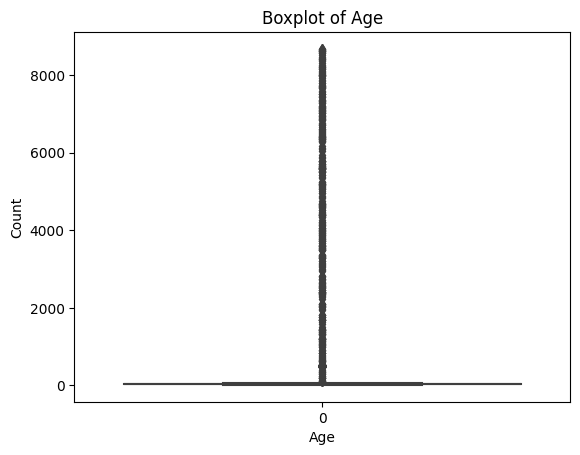

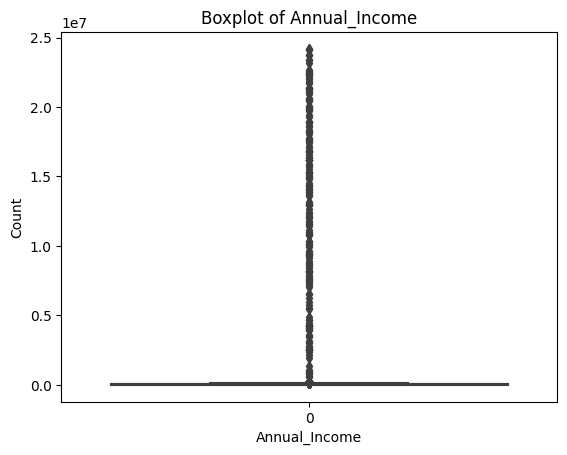

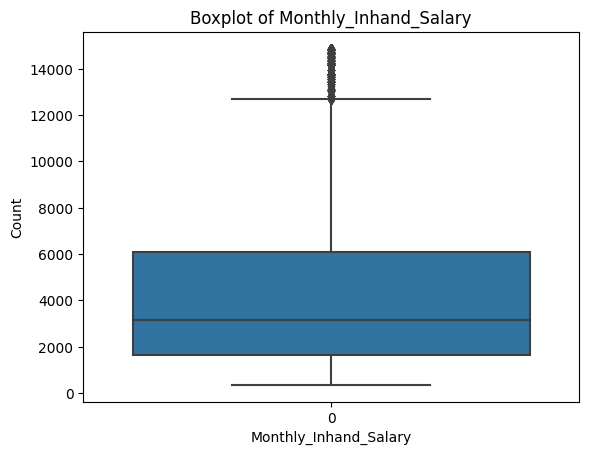

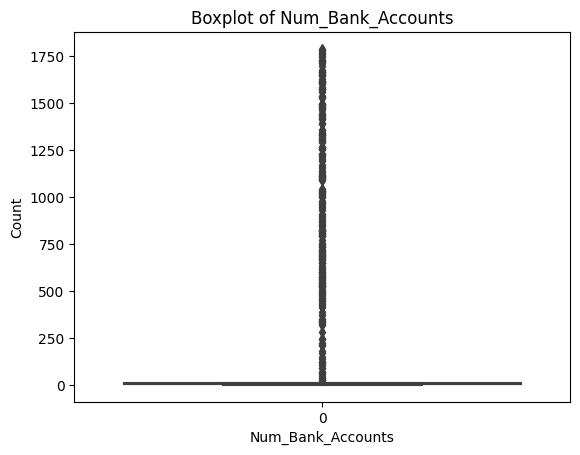

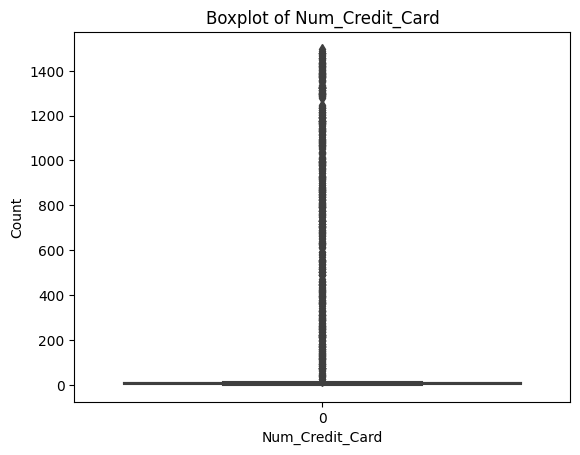

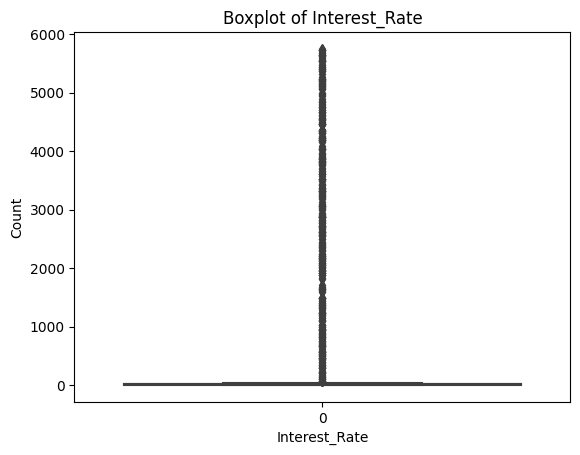

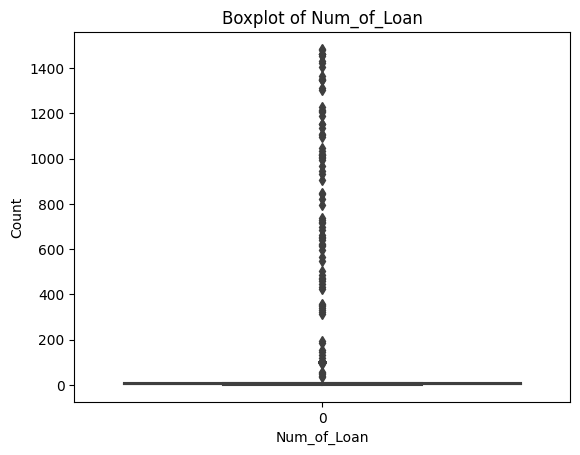

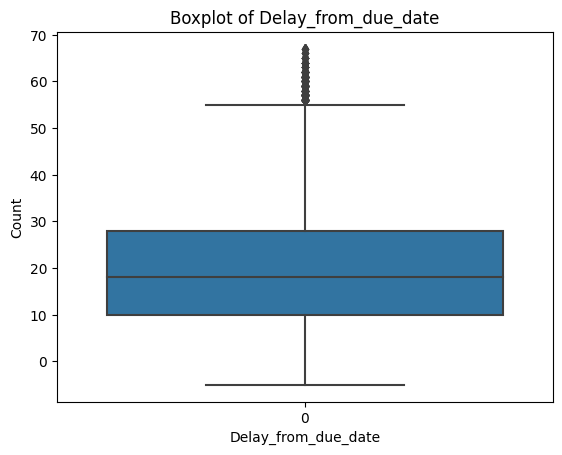

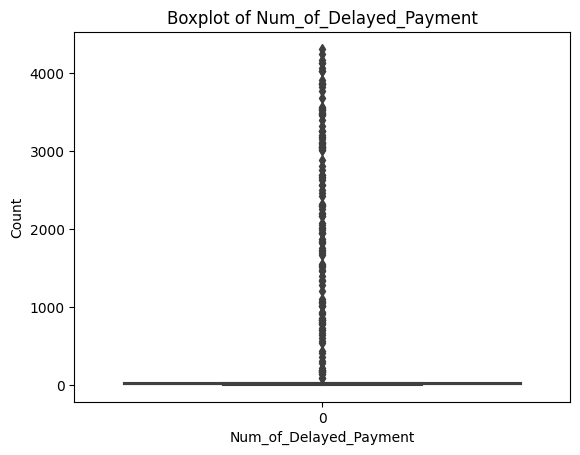

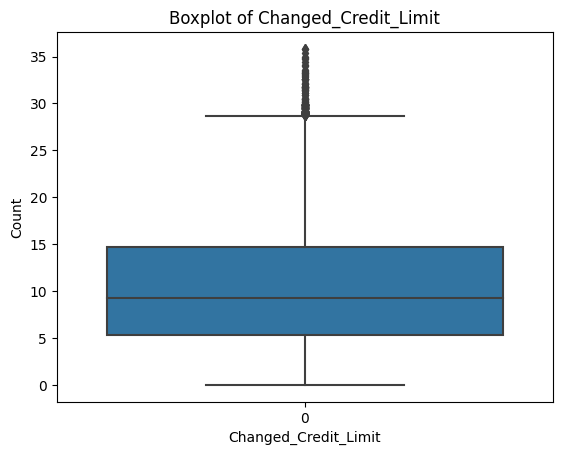

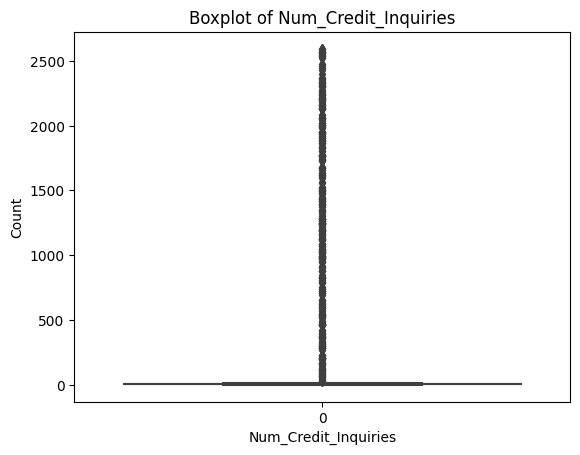

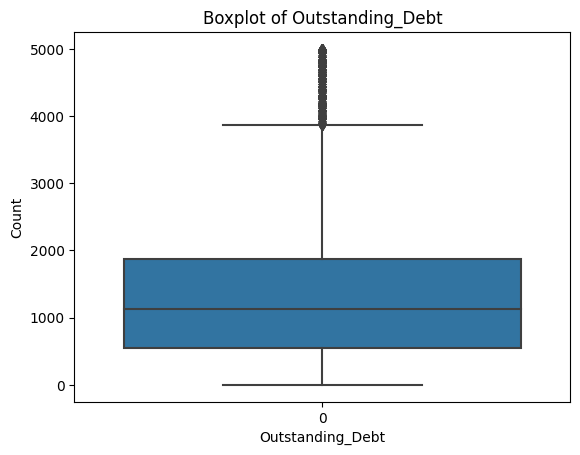

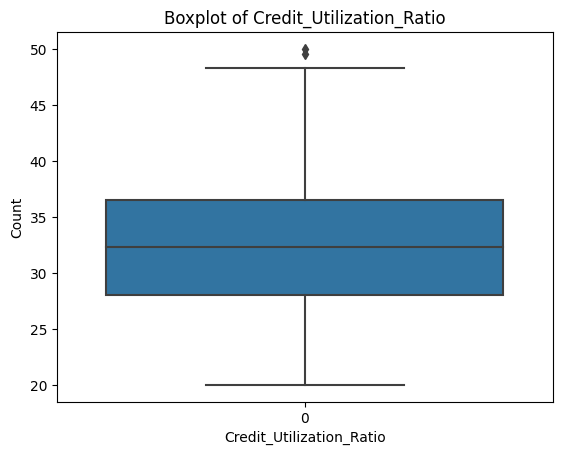

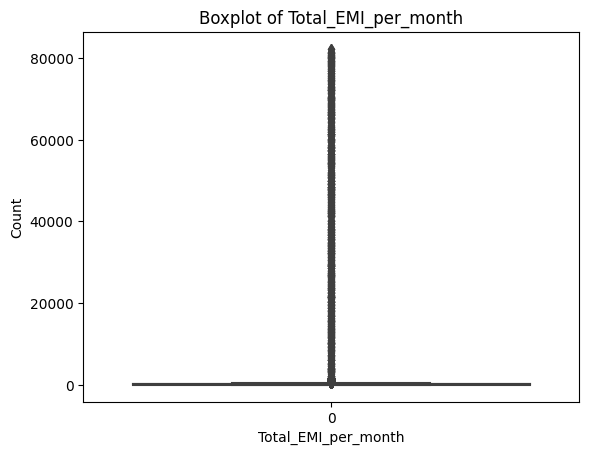

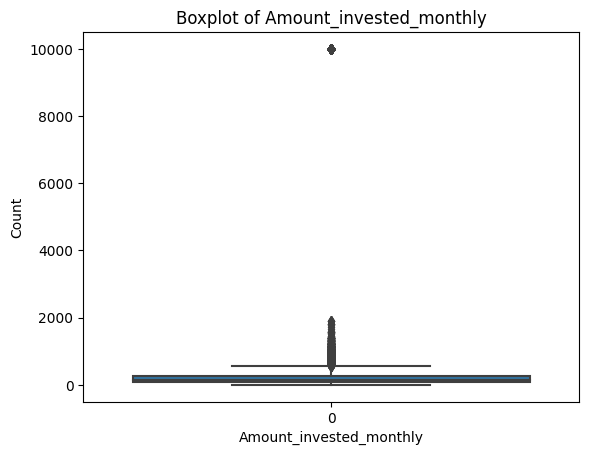

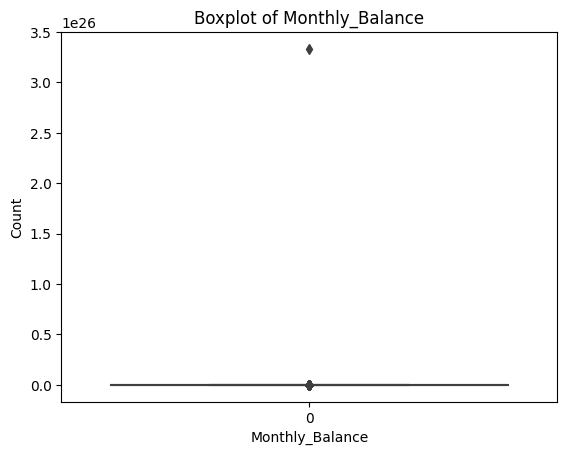

In [12]:
num_col = df.select_dtypes(include=['int','float'])
for i in num_col:
  sns.boxplot(df[i])
  plt.xlabel(f'{i}')
  plt.ylabel('Count')
  plt.title(f"Boxplot of {i}")
  plt.show()

In [13]:
def outlier_removal(outlier):
  for col in outlier:
    Q1 = np.percentile(df[col], 25)
    Q3 = np.percentile(df[col], 75)
    IQR = Q3 - Q1
    lower = Q1 - (1.25 * IQR)
    upper = Q3 + (1.25 * IQR)
    data = df[(df[col]>=lower) & (df[col]<=upper)]
    return data

outlier = num_col
df = outlier_removal(outlier)

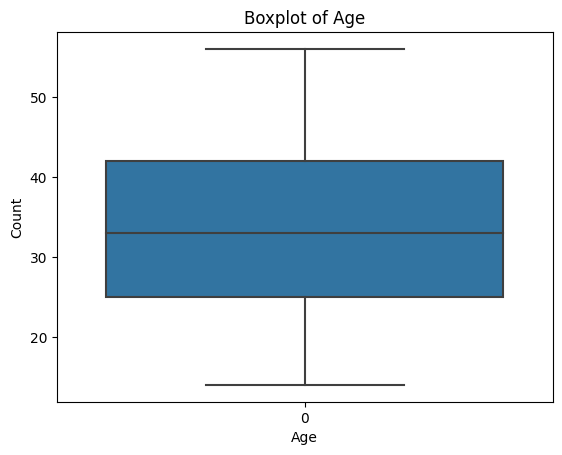

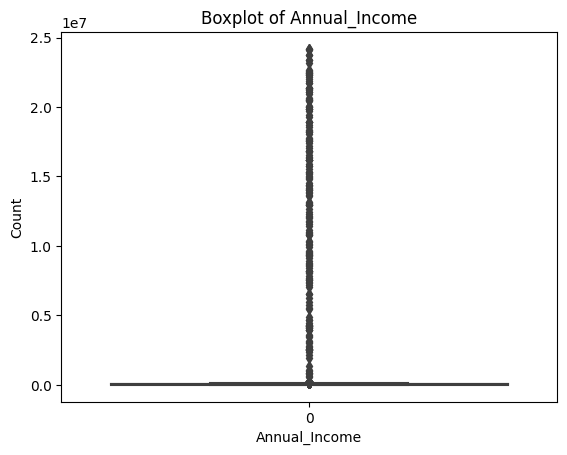

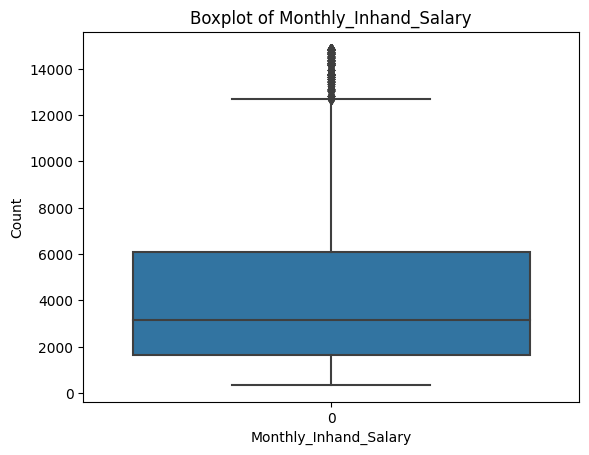

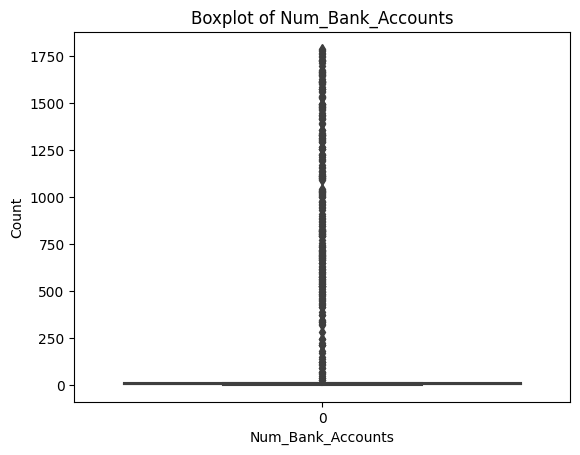

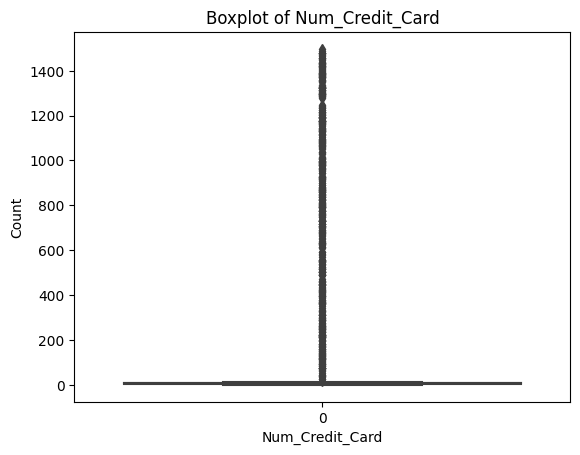

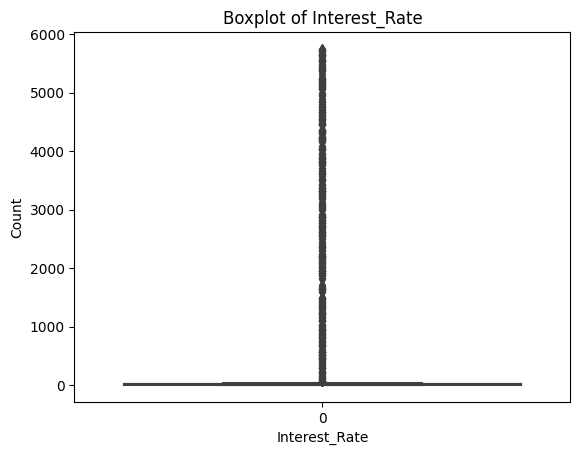

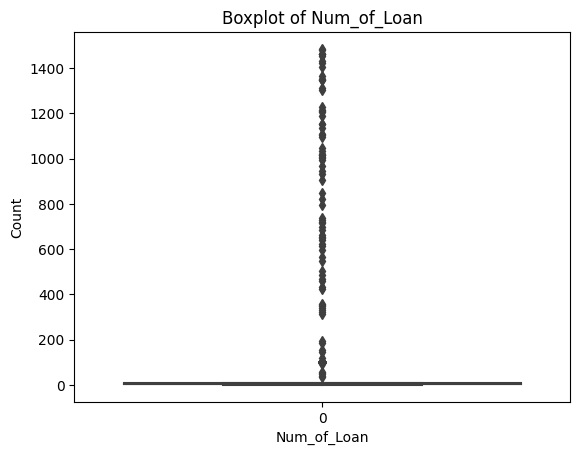

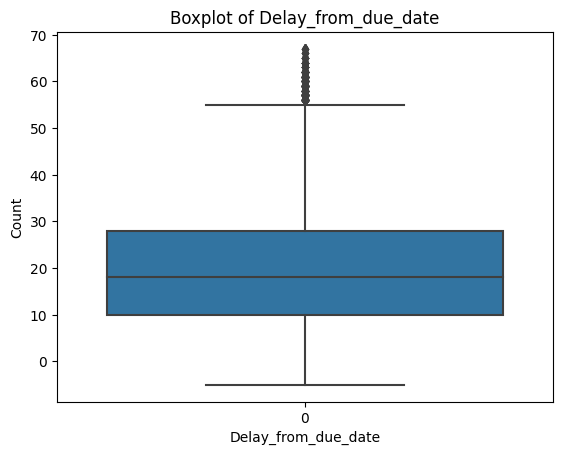

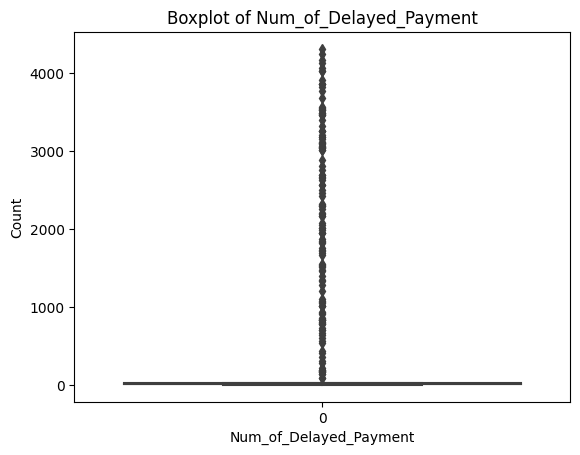

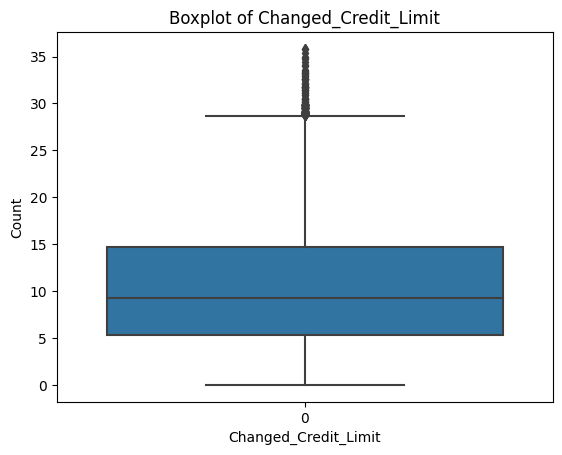

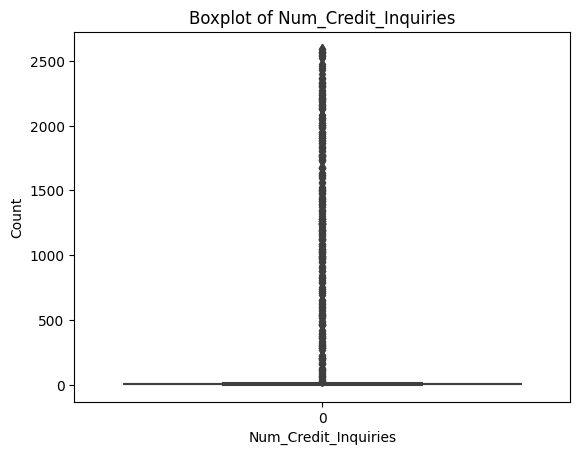

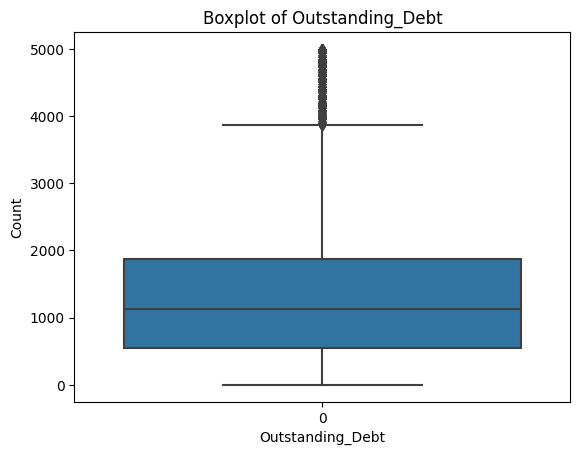

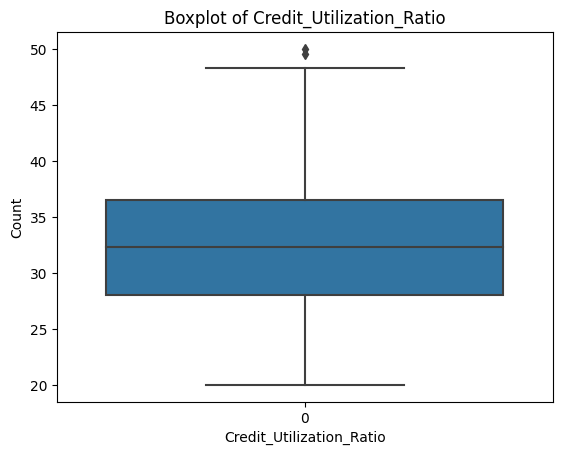

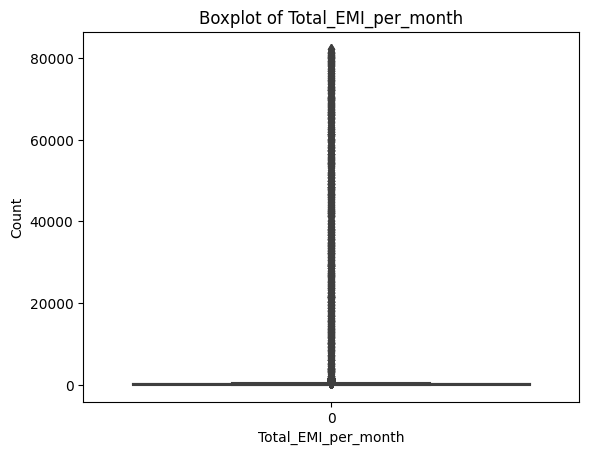

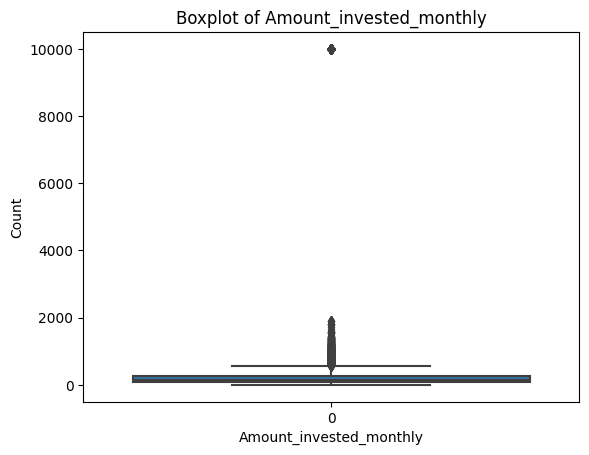

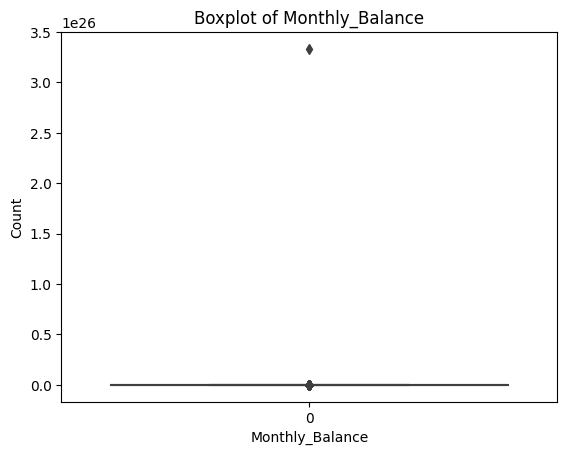

In [14]:
for i in num_col:
  sns.boxplot(df[i])
  plt.xlabel(f'{i}')
  plt.ylabel('Count')
  plt.title(f"Boxplot of {i}")
  plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder
cat_col = df.select_dtypes(include=object)

le = LabelEncoder()
for i in cat_col:
  df[i] = le.fit_transform(df[i])

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

X = df.drop('Credit_Score', axis=1)
y = df.Credit_Score

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = RandomForestClassifier()

rfe = RFE(model)
rfe.fit(x_train, y_train)
selected = X.columns[rfe.support_]
selected

Index(['Annual_Income', 'Interest_Rate', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

X = df[selected]
y = df.Credit_Score

ss = StandardScaler()
X = ss.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)} \n\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.6893184130213632 


              precision    recall  f1-score   support

           0       0.60      0.56      0.58       872
           1       0.69      0.69      0.69      1467
           2       0.71      0.73      0.72      2576

    accuracy                           0.69      4915
   macro avg       0.67      0.66      0.67      4915
weighted avg       0.69      0.69      0.69      4915



In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lgr = LogisticRegression()
lgr.fit(x_train,y_train)
y_pred = lgr.predict(x_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)} \n\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.6016276703967447 


              precision    recall  f1-score   support

           0       0.49      0.36      0.42       872
           1       0.64      0.44      0.52      1467
           2       0.61      0.77      0.68      2576

    accuracy                           0.60      4915
   macro avg       0.58      0.53      0.54      4915
weighted avg       0.60      0.60      0.59      4915



In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_validate

rfc = RandomForestClassifier()
cross = cross_validate(rfc, x_train, y_train, cv=5, scoring='accuracy')

rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)} \n\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.77029501525941 


              precision    recall  f1-score   support

           0       0.71      0.69      0.70       872
           1       0.78      0.78      0.78      1467
           2       0.79      0.79      0.79      2576

    accuracy                           0.77      4915
   macro avg       0.76      0.75      0.76      4915
weighted avg       0.77      0.77      0.77      4915



In [22]:
from hyperopt import hp, tpe, fmin, Trials, space_eval
from hyperopt.pyll import scope
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

def ob(para):
  model = RandomForestClassifier(**para)
  score = cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()
  return -score

def early_stopping(trial):
    if len(trial.losses()) >= max_evals:
        return True

    patience = 10
    if len(trial.losses()) >= patience:
        last_losses = trial.losses()[-patience:]
        if all(loss == last_losses[0] for loss in last_losses):
            return True

    return False

max_evals = 100
best_loss = np.inf

def ob_with_early_stopping(para):
    global best_loss

    if early_stopping(trials):
        return {'loss': best_loss, 'status': 'ok'}

    loss = ob(para)
    if loss < best_loss:
        best_loss = loss

    return {'loss': loss, 'status': 'ok'}

space = {
    'n_estimators':scope.int(hp.quniform('n_estimators',50,500,1)),
    'criterion':hp.choice('criterion',['gini','entropy','log_loss']),
    'max_depth':scope.int(hp.quniform('max_depth',3,15,1)),
    'min_samples_split':scope.int(hp.quniform('min_samples_split',2,100,1)),
    'min_samples_leaf':scope.int(hp.quniform('min_samples_leaf',2,25,1)),
    'max_features':hp.choice('max_features',['sqrt','log2',None]),
    'class_weight':hp.choice('class_weight',['balanced','balanced_subsample',None])
}

trials = Trials()

best = fmin(fn=ob_with_early_stopping ,space=space ,algo=tpe.suggest ,max_evals=max_evals ,trials=trials)
best_para = space_eval(space, best)

100%|██████████| 100/100 [1:28:34<00:00, 53.14s/trial, best loss: -0.6818429971950014]


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_validate

rfc = RandomForestClassifier(**best_para)
cross = cross_validate(rfc, x_train, y_train, cv=5, scoring='accuracy')

rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)} \n\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.7145473041709054 


              precision    recall  f1-score   support

           0       0.53      0.76      0.63       872
           1       0.75      0.69      0.72      1467
           2       0.79      0.71      0.75      2576

    accuracy                           0.71      4915
   macro avg       0.69      0.72      0.70      4915
weighted avg       0.73      0.71      0.72      4915



In [25]:
best_para

{'class_weight': None,
 'criterion': 'log_loss',
 'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 20,
 'n_estimators': 370}